# 2. image acquisition

In [1]:
import os
import time
from useq import MDAEvent, MDASequence, Position
from pymmcore_plus.mda import mda_listeners_connected
from pymmcore_plus.mda.handlers import ImageSequenceWriter
import matplotlib.pyplot as plt
import matplotlib.image as img
import cv2
import numpy as np
from scipy.optimize import curve_fit
import glob
import pandas as pd
import m2stitch
from os import path

# set micro manager directory
mm_dir = 'D:\ProgramFiles\Micro-Manager-2.0'

# load micro manager system configuration
from pymmcore_plus import CMMCorePlus, Device, DeviceAdapter, ConfigGroup
core = CMMCorePlus()
#core_plus.setDeviceAdapterSearchPaths([mm_dir])
core.loadSystemConfiguration(os.path.join(mm_dir, 'MMConfig_Edge42_SOLA_ASIStage_PixelSize.cfg'))

In [2]:
# set field of view size

f = 1192.8

### snap image

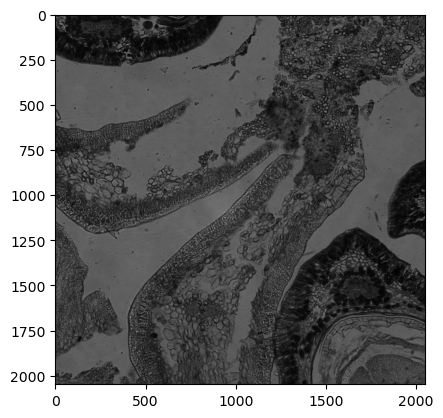

In [3]:
core.setConfig('LED_light', 'on')
core.snapImage()
im = core.getImage()
core.setConfig('LED_light', 'off')

fig, ax = plt.subplots()
ax.imshow(im, cmap='gray')

### create acquisition sequence

In [4]:
# 3 stage positions

f = 1192.8
z = -275.7

mda_seq = MDASequence(
    stage_positions=[(0, 0, z), (f, 0, z), (2*f, 0, z)],
    config_group='LED_light',
    #channels=["DAPI", "FITC"],
    #time_plan={'interval': 1, 'loops': 20},
    #z_plan={"range": 4, "step": 0.5},
    #axis_order='tpcz',
)
events = list(mda_seq)
print(len(events))

3


In [5]:
# create grid with rows and columns

f = 1192.8
z = -924.7

sequence = MDASequence(
    axis_order = "tpgcz",
    stage_positions = [(1000, 1500, z)],
    grid_plan = {"rows": 2, "columns": 2, 
               'relative_to': 'center',
               'overlap': 20,
               'mode': 'row_wise',
               'fov_width': f,
               'fov_height': f},
    channels = [{'group': 'LED_light', 'config': 'on'}]
)

events = list(sequence)
print(len(events), events[0])

4 index=mappingproxy({'p': 0, 'g': 0, 'c': 0}) channel=Channel(config='on', group='LED_light') x_pos=522.88 y_pos=1977.12 z_pos=-924.7


### run acquisition sequence = list(event, event, event, ...)

In [6]:
# define writer to save image files

png_writer = ImageSequenceWriter(r'C:\Users\Admin\Desktop\test_files', extension=".png", overwrite=True)

2024-08-14 17:51:25,749 - pymmcore-plus - INFO - (_runner.py:321) MDA Started: stage_positions=(Position(x=1000.0, y=1500.0, z=-924.7, name=None, sequence=None),) grid_plan=GridRowsColumns(fov_width=1192.7552, fov_height=1192.7552, overlap=(20.0, 20.0), mode=<OrderMode.row_wise: 'row_wise'>, rows=2, columns=2, relative_to=<RelativeTo.center: 'center'>) channels=(Channel(config='on', group='LED_light', exposure=None, do_stack=True, z_offset=0.0, acquire_every=1, camera=None),)
2024-08-14 17:51:25,751 - pymmcore-plus - INFO - (_runner.py:283) index=mappingproxy({'p': 0, 'g': 0, 'c': 0}) channel=Channel(config='on', group='LED_light') x_pos=522.88 y_pos=1977.12 z_pos=-924.7
2024-08-14 17:51:26,624 - pymmcore-plus - INFO - (_runner.py:283) index=mappingproxy({'p': 0, 'g': 1, 'c': 0}) channel=Channel(config='on', group='LED_light') x_pos=1477.12 y_pos=1977.12 z_pos=-924.7
2024-08-14 17:51:27,334 - pymmcore-plus - INFO - (_runner.py:283) index=mappingproxy({'p': 0, 'g': 2, 'c': 0}) channel=C

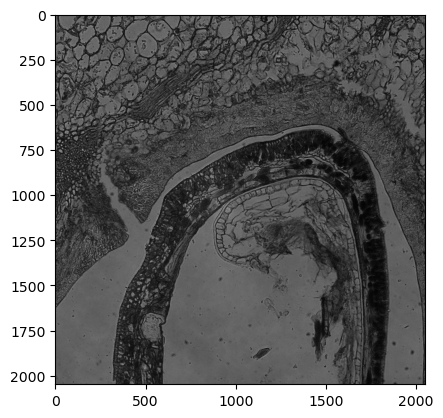

In [7]:
# run acquisition sequence

with mda_listeners_connected(png_writer):
    core.mda.run(sequence)
    
core.snapImage()
im = core.getImage()

fig, ax = plt.subplots()
ax.imshow(im, cmap='grey')

core.setConfig('LED_light', 'off')